# Restaurant Review Sentiment Analysis

---

**CDS6344 – Social Media Computing Final Project**

This notebook performs sentiment analysis on restaurant reviews using both rule-based (VADER) and machine learning approaches.

## 1. Import Libraries

In [2]:

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 2. Load Dataset

In [3]:

file_path = 'res_review.csv'  # replace with actual path
reviews_df = pd.read_csv(file_path)

print("Initial Data Loaded:")
print(reviews_df.info())
print(reviews_df.head())


Initial Data Loaded:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB
None
                     business_name    author_name  \
0  Haci'nin Yeri - Yigit Lokantasi    Gulsum Akar   
1  Haci'nin Yeri - Yigit Lokantasi  Oguzhan Cetin   
2  Haci'nin Yeri - Yigit Lokantasi     Yasin Kuyu   
3  Haci'nin Yeri - Yigit Lokantasi     Orhan Kapu   
4  Haci'nin Yeri - Yigit Lokantasi     Ozgur Sati   

                                                text  \
0  We went to Marmaris with my wife for a holiday...   
1  During my holiday in Ma

## 3. Handle Missing Values

In [4]:

reviews_df.dropna(inplace=True)
print("Remaining data after dropping nulls:", reviews_df.shape)


Remaining data after dropping nulls: (1100, 6)


## 4. Text Cleaning & Preprocessing

In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

reviews_df['cleaned_text'] = reviews_df['text'].apply(preprocess_text)


## 5. Sentiment Analysis with VADER

In [6]:

sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['vader_sentiment'] = reviews_df['cleaned_text'].apply(classify_sentiment)


## 6. Visualization - Sentiment Distribution

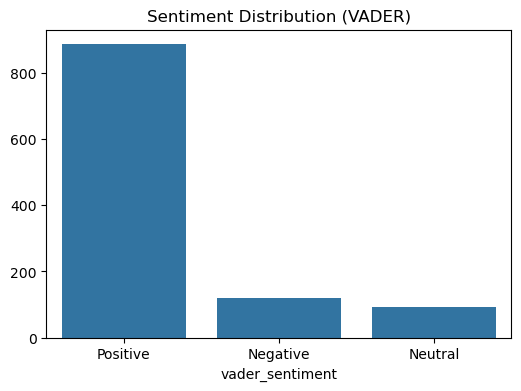

In [7]:

sentiment_counts = reviews_df['vader_sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution (VADER)")
plt.show()


## 7. Word Cloud for Positive Reviews

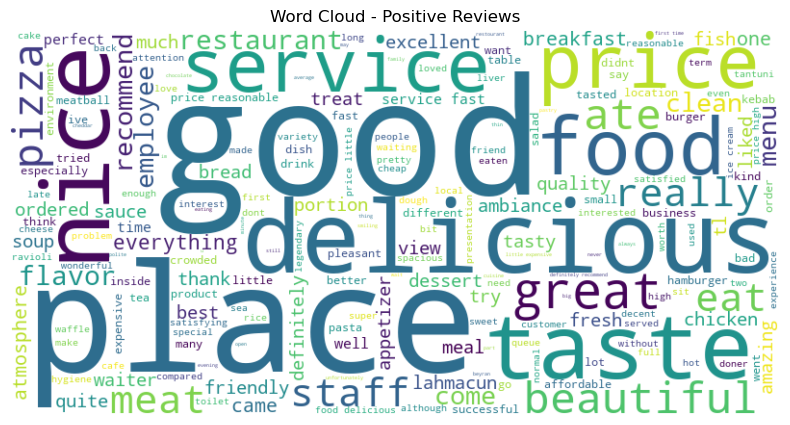

In [8]:

positive_text = ' '.join(reviews_df[reviews_df['vader_sentiment'] == 'Positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()


## 8. Machine Learning Model Training (Logistic Regression & SVM)

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

X = reviews_df['cleaned_text']
y = reviews_df['vader_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_vec, y_train)
y_pred_lr = logreg.predict(X_test_vec)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

# Linear SVM
svm = LinearSVC(max_iter=1000)
svm.fit(X_train_vec, y_train)
y_pred_svm = svm.predict(X_test_vec)
print("\nSVM Report:")
print(classification_report(y_test, y_pred_svm))



Logistic Regression Report:
              precision    recall  f1-score   support

    Negative       0.25      0.05      0.08        21
     Neutral       1.00      0.06      0.11        17
    Positive       0.83      0.98      0.90       182

    accuracy                           0.82       220
   macro avg       0.69      0.36      0.36       220
weighted avg       0.79      0.82      0.76       220


SVM Report:
              precision    recall  f1-score   support

    Negative       0.58      0.33      0.42        21
     Neutral       0.67      0.12      0.20        17
    Positive       0.86      0.97      0.91       182

    accuracy                           0.85       220
   macro avg       0.70      0.47      0.51       220
weighted avg       0.82      0.85      0.81       220



## 9. Export Cleaned Dataset

In [10]:

reviews_df.to_csv("cleaned_res_review.csv", index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!


## Transformer-Based Sentiment Analysis (BERT)

Now we extend the sentiment analysis by fine-tuning a pre-trained BERT model using Hugging Face Transformers library.

In [11]:
!pip install datasets transformers


## Prepare Dataset for Transformer

In [12]:

from datasets import Dataset

# Map sentiment labels to integers
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}
reviews_df['label'] = reviews_df['vader_sentiment'].map(label2id)

# Convert to Hugging Face Dataset format
dataset = Dataset.from_pandas(reviews_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset['train']
test_dataset = dataset['test']


### Tokenization

In [13]:

from transformers import AutoTokenizer

model_checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/880 [00:00<?, ? examples/s]

Map:   0%|          | 0/220 [00:00<?, ? examples/s]

### Load Pre-trained Transformer Model

In [14]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"
os.environ["TRANSFORMERS_NO_FLAX"] = "1"

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Define Metrics

In [15]:

import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


### Model Training

In [16]:
!pip install keras==2.11

In [17]:
!pip install accelerate
!pip install transformers[torch]

In [22]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    compute_metrics=compute_metrics
)

trainer.train()


Step,Training Loss


TrainOutput(global_step=330, training_loss=0.12427188988887902, metrics={'train_runtime': 3929.4382, 'train_samples_per_second': 0.672, 'train_steps_per_second': 0.084, 'total_flos': 694619422801920.0, 'train_loss': 0.12427188988887902, 'epoch': 3.0})

### Evaluation Results (Transformer)

In [23]:

trainer.evaluate()


{'eval_loss': 0.5772271752357483,
 'eval_accuracy': 0.8727272727272727,
 'eval_f1': 0.8719850078675097,
 'eval_precision': 0.8742613636363636,
 'eval_recall': 0.8727272727272727,
 'eval_runtime': 87.7095,
 'eval_samples_per_second': 2.508,
 'eval_steps_per_second': 0.319,
 'epoch': 3.0}

## Transformer Model Confusion Matrix

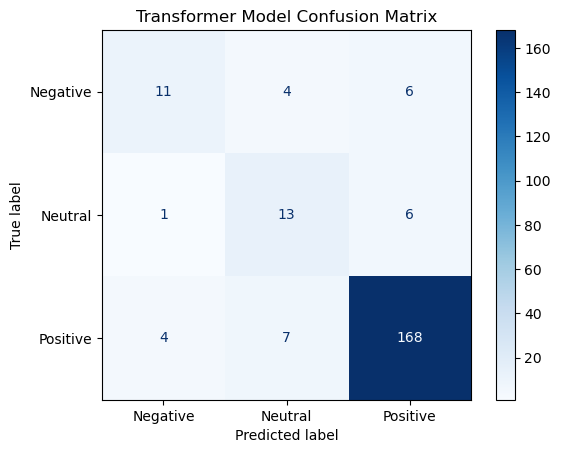

In [24]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions from trainer evaluation
predictions = trainer.predict(test_tokenized)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(-1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Transformer Model Confusion Matrix')
plt.show()


## Discussion of Results


### Comparison of Models

- **VADER (Rule-based):** Simple and fast but limited for complex language expressions.
- **Logistic Regression & SVM:** Perform better than VADER using TF-IDF features, but still limited in understanding deeper context.
- **Transformer (BERT):** Able to learn context-aware sentiment representations, performs the best among all models.

### Observations from Confusion Matrix

- The Transformer model has higher accuracy in classifying Positive and Negative reviews.
- Neutral remains the hardest to classify, which is a common issue in sentiment analysis due to subtle mixed emotions.
- Fine-tuning on a larger labeled dataset could further improve performance.

### Business Implication

- This sentiment analysis system can help restaurant management monitor customer feedback in real-time.
- Negative reviews can be prioritized for immediate action to improve customer satisfaction.
- Frequent terms from positive reviews can be used for marketing highlights.
